In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
os.chdir('../')
os.chdir('preprocessing/data_cleaning')
from new_data_cleaning import DataCleaning
os.chdir('../')
os.chdir('../')
os.chdir('models')
from KNN_and_Tree import SpecialKNN

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor, plot_importance
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [2]:
data_cleaner = DataCleaning(path="C:/Users/rnonc/OneDrive/Documents/projet ML/ml-project/data/train_airbnb_berlin.csv")
data_cleaner.df_creation()
# Dropping NaN values for some columns
data_cleaner.dropping_nan_values()
# OH for some columns
data_cleaner.to_one_hot()
# 0 / 1 encoding for some columns
data_cleaner.bool_to_numerical()
# Dealing with dates
data_cleaner.date_to_numerical()
# Dealing with Host Response Time column
data_cleaner.host_response_time()
# Creating a new feature
data_cleaner.feature_radius()
# Conversion to float
data_cleaner.to_float()
# Imputing missing values for some columns
data_cleaner.imputation(strategy="stochastic")
# Split
data_cleaner.train_test_splitting()
#train,test,val = data_cleaner.data_train, data_cleaner.data_test,data_cleaner.data_val
#train = pd.concat([train,val])
train,test =train_test_split(data_cleaner.df,test_size = 0.2,random_state = 42)

In [3]:
F = ['Beds','Bathrooms','Bedrooms','Accomodates','Guests Included','Room Type_Entire home/apt',
     'Property Type_Apartment']
F = ['Beds',
     'dist_to_center',
     'Property Type_Serviced apartment',
     'Neighborhood Group_Charlottenburg-Wilm.',
     'Host Response Time',
     'Accomodates',
     'Bathrooms',
     'Bedrooms',
     'Guests Included',
     'Property Type_Apartment',
     'Property Type_Hotel',
     'Room Type_Entire home/apt']
B = ['Longitude','Latitude']

### DecisionTreeRegressor

In [4]:
model2 = DecisionTreeRegressor(max_depth=15, min_samples_split = 85).fit(train[F],train['Price'])
test['error'] = model2.predict(test[F]) -test['Price']
train['error'] = model2.predict(train[F])-train['Price']
np.sqrt(mean_squared_error(model2.predict(test[F]),test['Price']))

35.38865724917682

Mean error :  21.70334871595911  euros
Relative mean error :  41.05369915613639 %
Quantile 1 :  -10.2421875  euros
Quantile 3 :  15.659465020576135  euros


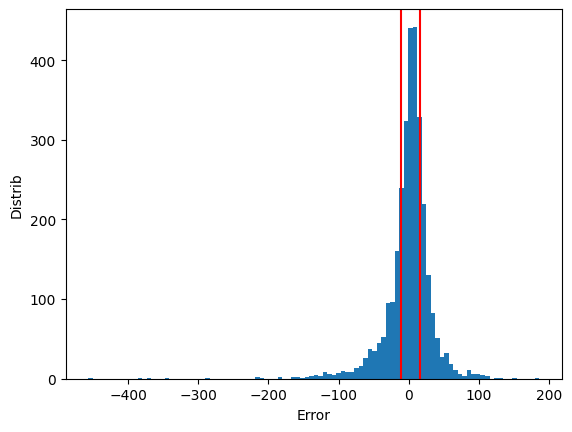

In [5]:
print('Mean error : ',np.mean(abs(test['error'])),' euros')
print('Relative mean error : ',np.mean(abs(test['error'])/test['Price'])*100,'%')
plt.hist(test['error'],bins=100)
Q = np.quantile(test['error'],[0.25,0.75])
plt.axvline(Q [0],color='r')
plt.axvline(Q[1],color='r')
plt.xlabel('Error')
plt.ylabel('Distrib')
print('Quantile 1 : ',Q[0],' euros')
print('Quantile 3 : ',Q[1],' euros')
plt.show()

### KNN + DecisionTreeRegressor

In [6]:
model = SpecialKNN(50)
model.model = DecisionTreeRegressor(max_depth=15, min_samples_split = 85)
#model.model = LinearRegression()
#model.model = XGBRegressor(objective="reg:squarederror")
model.fit(train[B],train[F],train['Price'])

test['error'] = model.predict(test[B],test[F]) -test['Price']
train['error'] = model.predict(train[B],train[F])-train['Price']
np.sqrt(mean_squared_error(model.predict(test[B],test[F]),test['Price']))

33.57518968753176

Mean error :  20.785894146287998  euros
Relative mean error :  40.852942920480665 %
Quantile 1 :  -9.20526472502021  euros
Quantile 3 :  15.770335677338954  euros


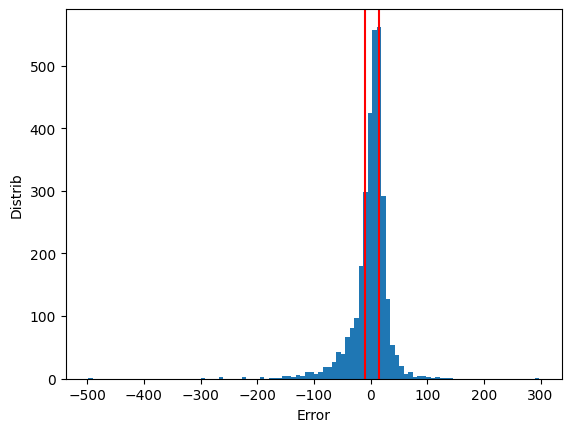

In [7]:
print('Mean error : ',np.mean(abs(test['error'])),' euros')
print('Relative mean error : ',np.mean(abs(test['error'])/test['Price'])*100,'%')
plt.hist(test['error'],bins=100)
Q = np.quantile(test['error'],[0.25,0.75])
plt.axvline(Q [0],color='r')
plt.axvline(Q[1],color='r')
plt.xlabel('Error')
plt.ylabel('Distrib')
print('Quantile 1 : ',Q[0],' euros')
print('Quantile 3 : ',Q[1],' euros')
plt.show()

### XGBRegressor

In [8]:
model2 = XGBRegressor(objective="reg:squarederror").fit(train[F],train['Price'])
test['error'] = model2.predict(test[F]) -test['Price']
train['error'] = model2.predict(train[F])-train['Price']
np.sqrt(mean_squared_error(model2.predict(test[F]),test['Price']))

35.706941604691906

Mean error :  21.441914739839845  euros
Relative mean error :  40.141101630515394 %
Quantile 1 :  -10.212561130523682  euros
Quantile 3 :  14.6082124710083  euros


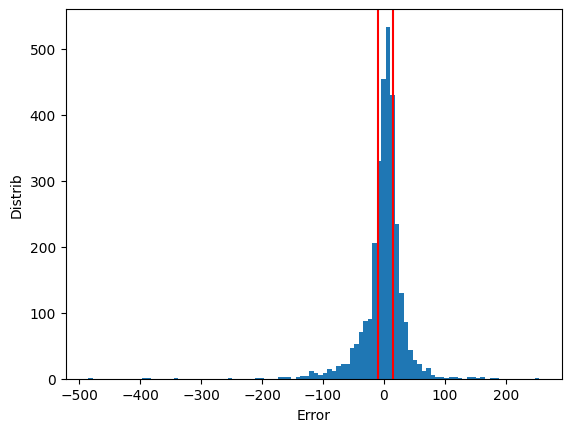

In [9]:
print('Mean error : ',np.mean(abs(test['error'])),' euros')
print('Relative mean error : ',np.mean(abs(test['error'])/test['Price'])*100,'%')
plt.hist(test['error'],bins=100)
Q = np.quantile(test['error'],[0.25,0.75])
plt.axvline(Q [0],color='r')
plt.axvline(Q[1],color='r')
plt.xlabel('Error')
plt.ylabel('Distrib')
print('Quantile 1 : ',Q[0],' euros')
print('Quantile 3 : ',Q[1],' euros')
plt.show()

### KNN + XGBRegressor

In [10]:
model = SpecialKNN(50)
model.model = DecisionTreeRegressor(max_depth=15, min_samples_split = 85)
#model.model = LinearRegression()
#model.model = XGBRegressor(objective="reg:squarederror")
model.fit(train[B],train[F],train['Price'])

test['error'] = model.predict(test[B],test[F]) -test['Price']
train['error'] = model.predict(train[B],train[F])-train['Price']
np.sqrt(mean_squared_error(model.predict(test[B],test[F]),test['Price']))

33.57723352420108

Mean error :  20.790788365338273  euros
Relative mean error :  40.85802954900355 %
Quantile 1 :  -9.244568384176217  euros
Quantile 3 :  15.7695319865208  euros


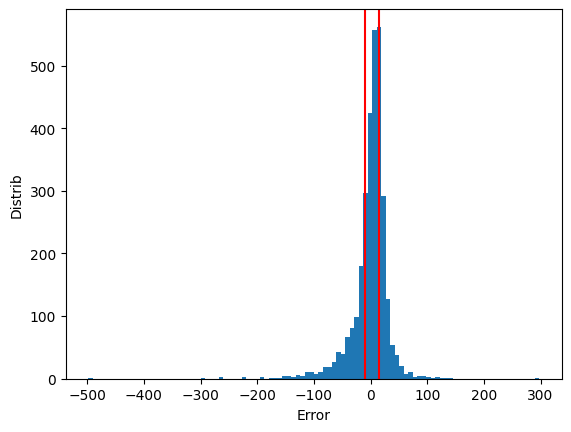

In [11]:
print('Mean error : ',np.mean(abs(test['error'])),' euros')
print('Relative mean error : ',np.mean(abs(test['error'])/test['Price'])*100,'%')
plt.hist(test['error'],bins=100)
Q = np.quantile(test['error'],[0.25,0.75])
plt.axvline(Q [0],color='r')
plt.axvline(Q[1],color='r')
plt.xlabel('Error')
plt.ylabel('Distrib')
print('Quantile 1 : ',Q[0],' euros')
print('Quantile 3 : ',Q[1],' euros')
plt.show()

Text(0, 0.5, 'Error')

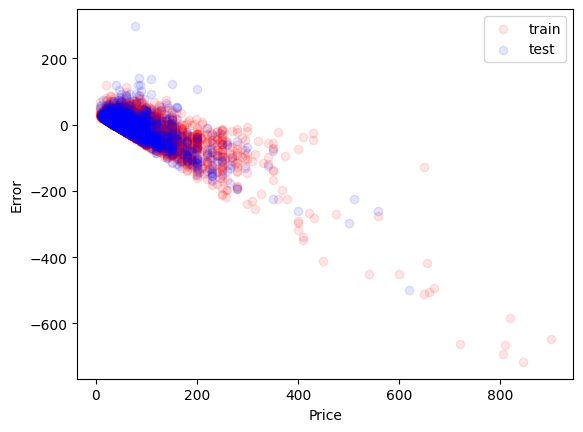

In [12]:
#Check error with y
y = 'Price'
plt.scatter(train[y],train['error'],color = 'r',alpha = 0.1,label='train')
plt.scatter(test[y],test['error'],color= 'b',alpha = 0.1,label='test')
plt.legend()
plt.xlabel(y)
plt.ylabel('Error')

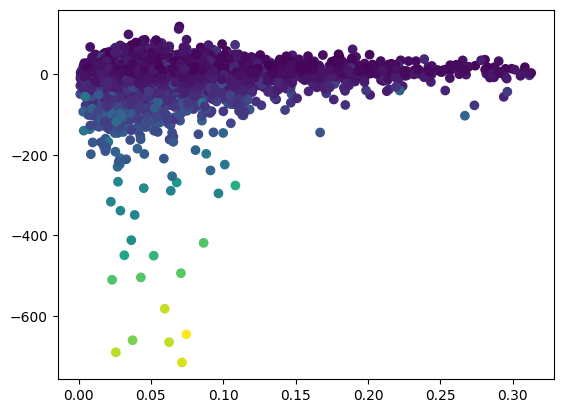

In [13]:
plt.scatter(train['dist_to_center'],train['error'],c=train['Price'])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'Beds'),
  Text(1, 0, 'dist_to_center'),
  Text(2, 0, 'Property Type_Serviced apartment'),
  Text(3, 0, 'Neighborhood Group_Charlottenburg-Wilm.'),
  Text(4, 0, 'Host Response Time'),
  Text(5, 0, 'Accomodates'),
  Text(6, 0, 'Bathrooms'),
  Text(7, 0, 'Bedrooms'),
  Text(8, 0, 'Guests Included'),
  Text(9, 0, 'Property Type_Apartment'),
  Text(10, 0, 'Property Type_Hotel'),
  Text(11, 0, 'Room Type_Entire home/apt'),
  Text(12, 0, 'Price')])

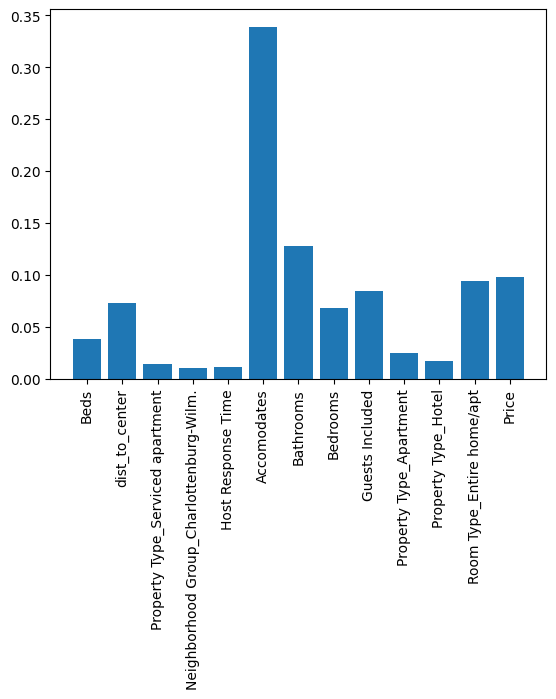

In [14]:
plt.bar(F+['Price'],model.feature_importances_)
plt.xticks(rotation=90)

In [16]:
test['Price']

14339     39.0
13003    100.0
4956      69.0
8743      55.0
10121     50.0
         ...  
12711     70.0
3523      50.0
9361      30.0
10771     54.0
11534     55.0
Name: Price, Length: 3054, dtype: float64